<a href="https://colab.research.google.com/github/Priyabrat845/Machine-Learning/blob/main/Credit_card_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score

In [24]:
data=pd.read_csv('/content/drive/MyDrive/Rough works/creditcard.csv')
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,Target
0,0.114697,0.796303,-0.149553,-0.823011,0.878763,-0.553152,0.939259,-0.108502,0.111137,-0.390521,-1.949546,-0.494436,-0.353696,0.158729,-0.267239,0.234802,-0.754936,-0.343012,0.312175,-0.042711,-0.335776,-0.807853,-0.055940,-1.025281,-0.369557,0.204653,0.242724,0.085713,0.89,0
1,-0.039318,0.495784,-0.810884,0.546693,1.986257,4.386342,-1.344891,-1.743736,-0.563103,-0.616315,-0.587786,0.317419,-0.408521,0.719639,0.226926,-0.296316,-0.040143,0.119177,1.057682,0.926255,-1.377003,-0.072200,-0.197573,1.014807,1.011293,-0.167684,0.113136,0.256836,85.00,0
2,2.275706,-1.531508,-1.021969,-1.602152,-1.220329,-0.462376,-1.196485,-0.147058,-0.950224,1.560463,-1.753256,-1.331010,-0.061941,-0.405532,0.048083,-0.307503,0.289363,0.189739,0.022546,-0.408289,-0.193271,-0.103533,0.150945,-0.811083,-0.197913,-0.128446,0.014197,-0.051289,42.70,0
3,1.940137,-0.357671,-1.210551,0.382523,0.050823,-0.171322,-0.109124,-0.002115,0.869258,-0.001965,0.607629,1.048673,-0.514821,0.329538,-1.041463,-0.498797,-0.276887,0.114245,0.379447,-0.199280,0.157994,0.650355,0.034206,0.739535,0.223605,-0.195509,-0.012791,-0.056841,29.99,0
4,1.081395,-0.502615,1.075887,-0.543359,-1.472946,-1.065484,-0.443231,-0.143374,1.659826,-1.131238,0.173132,1.430172,0.915609,-0.336588,1.140171,-0.653626,-0.016567,0.066287,0.242537,0.059880,0.224157,0.821209,-0.137223,0.986259,0.563228,-0.574206,0.089673,0.052036,68.00,0


In [25]:
data['Target'].value_counts()

0    56864
1       98
Name: Target, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


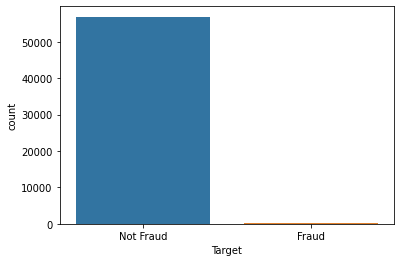

In [10]:
# visualize the target variable
#data['Target'].value_counts().plot(kind='bar')
g = sns.countplot(data['Target'])
g.set_xticklabels(['Not Fraud','Fraud'])
plt.show()

**The Metric Trap:**

One of the major issues when dealing with unbalanced datasets relates to the metrics used to evaluate their model. Using simpler metrics like accuracy score can be misleading. In a dataset with highly unbalanced classes, the classifier will always “predict” the most common class without performing any analysis of the features and it will have a high accuracy rate, obviously not the correct one.

Let’s do this experiment, using simple XGBClassifier and no feature engineering:

In [26]:
# Creating the dataset with all independent variables
X = data.drop('Target',axis=1)

# Creating the dataset with the dependent variable
Y = data['Target']

In [27]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 3)

In [28]:
print("Distribution of classes of dependent variable in train :")
print(Y_train.value_counts())

print("\n Distribution of classes of dependent variable in test :")
print(Y_test.value_counts())

Distribution of classes of dependent variable in train :
0    45492
1       77
Name: Target, dtype: int64

 Distribution of classes of dependent variable in test :
0    11372
1       21
Name: Target, dtype: int64


In [29]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2) #Euclidian distance is a kind of minkowski distance with p=2
classifier.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [30]:
y_pred=classifier.predict(X_test)

In [31]:
accuracy_score(y_pred,Y_test)

0.9987711752830686

In [32]:
confusion_matrix(y_pred,Y_test)

array([[11371,    13],
       [    1,     8]])

In [33]:
roc_auc_score(y_pred,Y_test)

0.9438734676348871

In [44]:
# Class count
class_count_0, class_count_1 = data['Target'].value_counts()

# Separate class
class_0 = data[data['Target'] == 0]
class_1 = data[data['Target'] == 1]
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (56864, 30)
class 1: (98, 30)


## **1. Random Under-Sampling**

In [45]:
class_0_under = class_0.sample(class_count_1)
test_under = pd.concat([class_0_under, class_1], axis=0)

In [47]:
test_under['Target'].value_counts()

1    98
0    98
Name: Target, dtype: int64

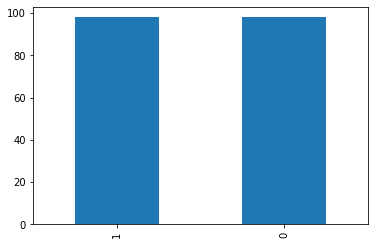

In [48]:
test_under['Target'].value_counts().plot(kind='bar')

In [49]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42, replacement=True)
x_rus, y_rus = rus.fit_resample(data.iloc[:,0:-1], data['Target'])

print('Original dataset shape:', len(data))
print('Resampled dataset shape', len(y_rus))

Original dataset shape: 56962
Resampled dataset shape 196


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


## **2. Random Over-Sampling**

In [50]:
class_1_over = class_1.sample(class_count_0, replace=True)
test_over = pd.concat([class_1_over, class_0], axis=0)

In [51]:
test_over['Target'].value_counts()

1    56864
0    56864
Name: Target, dtype: int64

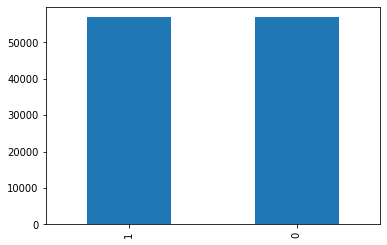

In [52]:
test_over['Target'].value_counts().plot(kind='bar')

In [53]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
x_ros, y_ros = ros.fit_resample(data.iloc[:,0:-1], data['Target'])

print('Original dataset shape:', len(data))
print('Resampled dataset shape', len(y_ros))

Original dataset shape: 56962
Resampled dataset shape 113728


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


## **3. Under-Sampling: Tomek links**

In [54]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks(ratio='majority')

X_tl, y_tl = tl.fit_sample(data.iloc[:,0:-1], data['Target'])

print('Original dataset shape:', len(data))
print('Resampled dataset shape', len(y_tl))

Original dataset shape: 56962
Resampled dataset shape 56955


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


## 4. **Synthetic Minority Oversampling Technique (SMOTE)**

In [55]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(data.iloc[:,0:-1], data['Target'])

print('Original dataset shape', len(data))
print('Resampled dataset shape', len(y_smote))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Original dataset shape 56962
Resampled dataset shape 113728


## **5. Penalize Algorithms (Cost-Sensitive Training)**

In [56]:
from sklearn.svm import SVC

# we can add class_weight='balanced' to add penalize mistake
svc_model = SVC(class_weight='balanced', probability=True)

svc_model.fit(X_train, Y_train)

svc_predict = svc_model.predict(X_test)
print('ROCAUC score:',roc_auc_score(Y_test, svc_predict))
print('Accuracy score:',accuracy_score(Y_test, svc_predict))

ROCAUC score: 0.9218443796794131
Accuracy score: 0.986307381725621


## **Let's use SMOTE + Deep Neural Network**

In [58]:
# Splitting the dataset into the Training set and Test set
x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size = 0.2, random_state = 3)

In [59]:
# DNN
from tensorflow import keras

def get_model():
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=[X_train.shape[-1]]),
        keras.layers.Dense(512, activation='relu'),
        keras.layers.Dense(256, activation='relu'),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(9, activation='softmax')
    ])
    model.compile(optimizer='adam', 
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [60]:
# DNN (fit and validation)
import tensorflow as tf

batch_size = 512
train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(len(x_train)).batch(batch_size)
val_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(batch_size)

model = get_model()
fit = model.fit(train_ds, validation_data=val_ds, epochs=20)

Epoch 1/20
178/178 [==============================] - 5s 21ms/step - loss: 0.4821 - accuracy: 0.8888 - val_loss: 0.0303 - val_accuracy: 0.9913
Epoch 2/20
178/178 [==============================] - 4s 20ms/step - loss: 0.0819 - accuracy: 0.9815 - val_loss: 0.0457 - val_accuracy: 0.9926
Epoch 3/20
178/178 [==============================] - 4s 20ms/step - loss: 0.0505 - accuracy: 0.9863 - val_loss: 0.0250 - val_accuracy: 0.9892
Epoch 4/20
178/178 [==============================] - 4s 19ms/step - loss: 0.0390 - accuracy: 0.9895 - val_loss: 0.0216 - val_accuracy: 0.9904
Epoch 5/20
178/178 [==============================] - 4s 20ms/step - loss: 0.0344 - accuracy: 0.9904 - val_loss: 0.0184 - val_accuracy: 0.9942
Epoch 6/20
178/178 [==============================] - 4s 20ms/step - loss: 0.0379 - accuracy: 0.9902 - val_loss: 0.0124 - val_accuracy: 0.9966
Epoch 7/20
178/178 [==============================] - 4s 20ms/step - loss: 0.0182 - accuracy: 0.9942 - val_loss: 0.0155 - val_accuracy: 0.9966

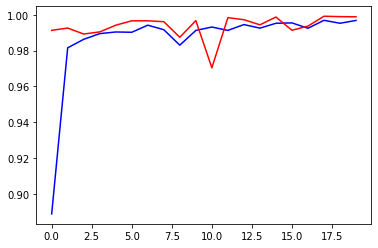

In [61]:
import matplotlib.pyplot as plt

plt.plot(fit.history['accuracy'], color='blue')
plt.plot(fit.history['val_accuracy'], color='red')
plt.show()

In [62]:
y_pred_nn = model.predict_classes(val_ds)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [63]:
print('ROCAUC score:', roc_auc_score(y_test, y_pred_nn))
print('Accuracy score:', accuracy_score(y_test, y_pred_nn))

ROCAUC score: 0.998867891665941
Accuracy score: 0.9988569418798909


Finally we have built the machine learning model that have a very high accuracy rate(99%), which is close to 100%.